# Identifying Bees

In [1]:
from fastai2.vision.all import *

In [2]:
import os
os.getcwd()

'/Users/seoung-yeji/fastai2'

In [ ]:
#path = Path('/Users/seoung-yeji/Data')

In [ ]:
#path_t = path/'bees'
#path_t.mkdir(parents=True, exist_ok=True)
#path_t

In [ ]:
#! unzip -q -n {path}/bees.zip -d {path_t}

In [3]:
path = Path('/Users/seoung-yeji/Data/bees/kaggle_bee_vs_wasp')

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls()

(#13) [Path('labels.csv'),Path('bee1'),Path('.DS_Store'),Path('wasp1'),Path('example_notebook'),Path('other_noinsect'),Path('label_generator'),Path('README.md'),Path('wasp2'),Path('bee2')...]

In [6]:
df = pd.read_csv(path/'df_train.csv', low_memory=False); df.head()

,Unnamed: 0,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,0,1,bee1/10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,2,3,bee1/10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee
2,4,5,bee1/10128235063_dca17db76c_n.jpg,1,0,0,0,1,0,0,bee
3,5,6,bee1/10130729734_f68738333e_w.jpg,1,0,0,0,1,0,0,bee
4,6,7,bee1/10166485783_9cd6706c72_n.jpg,1,0,0,0,1,0,0,bee


In [7]:
df['path'] = df['path'].apply(lambda x: x.replace('\\', '/'))

In [8]:
df.tail()

,Unnamed: 0,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
9653,11411,11412,other_noinsect/581206.jpg,0,0,0,1,0,0,0,other
9654,11413,11414,other_noinsect/581451.jpg,0,0,0,1,0,1,0,other
9655,11415,11416,other_noinsect/581668.jpg,0,0,0,1,0,1,0,other
9656,11418,11419,other_noinsect/581880.jpg,0,0,0,1,0,1,0,other
9657,11420,11421,other_noinsect/9695883931_d5efb955d2_m.jpg,0,0,0,1,0,0,0,other


In [9]:
df.shape

(9658, 11)

In [10]:
df['label'].unique()

array(['bee', 'wasp', 'insect', 'other'], dtype=object)

In [14]:
#df.drop(['is_bee', 'is_wasp', 'is_otherinsect', 'is_other', 'photo_quality', 'is_final_validation'], axis=1, inplace=True)
df.set_index('id')
df.head()

,Unnamed: 0,id,path,is_validation,label
0,0,1,bee1/10007154554_026417cfd0_n.jpg,0,bee
1,2,3,bee1/10092043833_7306dfd1f0_n.jpg,1,bee
2,4,5,bee1/10128235063_dca17db76c_n.jpg,0,bee
3,5,6,bee1/10130729734_f68738333e_w.jpg,0,bee
4,6,7,bee1/10166485783_9cd6706c72_n.jpg,0,bee


In [15]:
valid_idx = df.index[df['is_validation']==1].tolist()

In [16]:
train_idx = df.index[df['is_validation']==0].tolist()

In [23]:
def splitter(df):
    train = df.index[df['is_validation']==0].tolist()
    valid = df.index[df['is_validation']==1].tolist()
    return train, valid

In [24]:
def get_x(r): return path/r['path']

In [25]:
def get_y(r): return r['label']

In [26]:
dblock = DataBlock(get_x=get_x, get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('other_insect/5766734985_7ca7b9fa6e_m.jpg'), 'insect')

In [27]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=640x640, TensorCategory(3))

In [33]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    splitter=splitter,
    get_x=get_x,
    get_y=get_y,
    item_tfms=Resize(224)
)

dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=320x213, TensorCategory(0))

In [34]:
dblock.summary(df)

Setting-up type transforms pipelines
0              0      1           bee1/10007154554_026417cfd0_n.jpg   
1              2      3           bee1/10092043833_7306dfd1f0_n.jpg   
2              4      5           bee1/10128235063_dca17db76c_n.jpg   
3              5      6           bee1/10130729734_f68738333e_w.jpg   
4              6      7           bee1/10166485783_9cd6706c72_n.jpg   
...          ...    ...                                         ...   
9653       11411  11412                   other_noinsect/581206.jpg   
9654       11413  11414                   other_noinsect/581451.jpg   
9655       11415  11416                   other_noinsect/581668.jpg   
9656       11418  11419                   other_noinsect/581880.jpg   
9657       11420  11421  other_noinsect/9695883931_d5efb955d2_m.jpg   

      is_validation  label  
0                 0    bee  
1                 1    bee  
2                 0    bee  
3                 0    bee  
4                 0    bee  
...    

In [35]:
dls = dblock.dataloaders(df)

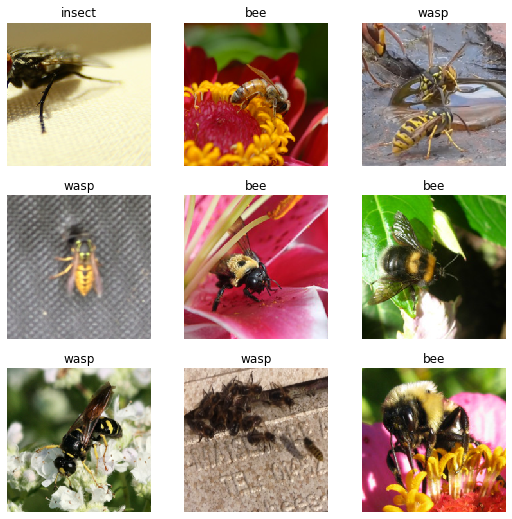

In [36]:
dls.show_batch()